# Final Version - Sentiment Analysis of the 2023 Nigeria Presidential Elections

<b>Student Name:</b> Obiechina Christian Somtoo <br>

### Aim:

1. To perform a Twitter sentiment analysis of the 2023 Nigeria Presidential Elections using Naive Bayes Classifier (ML approach) and compare the performance with a RNN deep learning model.

2. To establish the correlation or lack thereof between social media sentiments and actual election outcome.

### Workflow

1. <b>Data Collection:</b> Used a Kaggle dataset fit for purpose, dataset can be found here - https://www.kaggle.com/datasets/gpreda/nigerian-presidential-election-2023-tweets.

2. <b>Data Preprocessing:</b> Preprocess the tweets by removing any unnecessary information such as URLs, hashtags, mentions, and special characters. Remove stop words and perform stemming or lemmatization to reduce the number of features. Also determine by extraction which candidate a tweet is about and assign appropriate candidate name tag to the tweet.

3. <b>Labeling:</b> Label each tweet as positive, negative or neutral sentiment based on the overall sentiment conveyed in the text.

4. <b>Feature Extraction:</b> Extract relevant features from the cleaned and labeled tweets. I intend to use either bag-of-words or TF-IDF to represent the tweets as numerical vectors.

5. <b>Training and Testing:</b> Split the labeled data into a training set and a testing set. Train the Naive Bayes classifier on the training set and evaluate model performance on the testing set using metrics such as confusion matrics, accuracy, precision, recall, and F1-score.

6. <b>Prediction:</b> Use the trained models to predict the sentiment of new tweets related to the 2023 Nigeria presidential elections.

7. <b>Visualization:</b> Visualize the results of the sentiment analysis using charts, graphs or word clouds.

8. <b>Analysis:</b> Analyze and compare outcome of both models. Does the sentiment analysis correlate with the actual election outcome?

## Data Collection & Preprocessing

### Data Collection

Import all necessary libaries and read the data in the notebook using the pandas library.

<b> Importing the necessary libraries. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocessing

Load the dataset into a Pandas dataframe:

In [2]:
df = pd.read_csv('kaggle_dataset.csv')

/var/folders/q8/rbryqcvn01jcb9tpfkgn9g6c0000gn/T/ipykernel_6501/335229600.py:1: DtypeWarning: Columns (0,5,6,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_dataset.csv')


In [3]:
df.head() #preview the dataframe

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244.0,999.0,686.0,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688.0,2827.0,3488.0,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2.0,22.0,40.0,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474.0,1931.0,129947.0,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22.0,198.0,540.0,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91008 entries, 0 to 91007
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                91007 non-null  object 
 1   user_name         91003 non-null  object 
 2   user_location     68391 non-null  object 
 3   user_description  83182 non-null  object 
 4   user_created      90995 non-null  object 
 5   user_followers    90995 non-null  object 
 6   user_friends      90995 non-null  object 
 7   user_favourites   90995 non-null  object 
 8   user_verified     90993 non-null  object 
 9   date              90995 non-null  object 
 10  text              90995 non-null  object 
 11  hashtags          48300 non-null  object 
 12  source            90995 non-null  object 
 13  retweets          90990 non-null  object 
 14  favorites         90989 non-null  float64
 15  is_retweet        90989 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

Change datatype of all tweets to string.

In [5]:
df['text'] = df['text'].astype(str)

Clean the text data by removing URLs, mentions, hashtags, special characters, and stop words. You can use the following function to do this:

In [6]:
def clean_text(text):
    """
    This function uses the regular expression library to
    remove URLs, unwate symbols and digits.
    """
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@[^\s]+', '', text) # Remove mentions
    text = re.sub(r'#([^\s]+)', '', text) # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = re.sub(r'\d+', '', text) # Remove digits
    text = text.lower() # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # Remove stop words
    return text

Create a new column in the dataframe to store the cleaned text data:

In [7]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

Next, I created a new column candidate_name that will contain the name of the candidate mentioned in each tweet. I used regular expressions to extract the candidate names from the tweet column.

In [8]:

# Define a function to extract candidate names from tweet
def extract_candidate_name(text):
    # Convert tweet to lowercase
    text = text.lower()
    # Extract candidate name using regular expression
    if re.search('peter|obi', text):
        return 'Peter Obi'
    elif re.search('tinubu', text):
        return 'Bola Ahmed Tinubu'
    elif re.search('atiku', text):
        return 'Atiku Abubakar'
    else:
        return np.nan

# Apply the extract_candidate_name function to the tweet column to create the candidate column
df['candidate'] = df['clean_text'].apply(extract_candidate_name)

To confirm everything was done correctly.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91008 entries, 0 to 91007
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                91007 non-null  object 
 1   user_name         91003 non-null  object 
 2   user_location     68391 non-null  object 
 3   user_description  83182 non-null  object 
 4   user_created      90995 non-null  object 
 5   user_followers    90995 non-null  object 
 6   user_friends      90995 non-null  object 
 7   user_favourites   90995 non-null  object 
 8   user_verified     90993 non-null  object 
 9   date              90995 non-null  object 
 10  text              91008 non-null  object 
 11  hashtags          48300 non-null  object 
 12  source            90995 non-null  object 
 13  retweets          90990 non-null  object 
 14  favorites         90989 non-null  float64
 15  is_retweet        90989 non-null  object 
 16  clean_text        91008 non-null  object

#### Tokenizing the Tweets

This will create a new column in the tweets_df DataFrame called "tokens" which will contain a list of individual words for each tweet.

In [10]:
# Tokenize tweets
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

#### Removing Stopwords from Tokenized Tweets
Stop words are words that do not carry any significant meaning in a text and are usually removed to focus on the more important words. Examples of stop words include "a", "an", "the", "and", "or", "but", "is", "am", "are", etc.

I used the NLTK library to remove stop words from the tokenized tweets using the code below:

In [11]:
stop_words = set(stopwords.words('english'))

tweets_tokenized = []

for text in df['clean_text']:
    tokens = nltk.word_tokenize(text.lower())
    tweets_tokenized.append(tokens)
    
tweets_tokenized_stopwords = []

for tweet_tokens in tweets_tokenized:
    tweet_tokens_stopwords = []
    for token in tweet_tokens:
        if not token in stop_words:
            tweet_tokens_stopwords.append(token)
    tweets_tokenized_stopwords.append(tweet_tokens_stopwords)

## Naïve Bayes Classifier

### Adding Sentiment Labels

In [12]:
# Import libraries
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the analyzers
nltk_analyzer = SentimentIntensityAnalyzer()

# Create empty lists for sentiment labels
nb_sentiments = []

# Loop through the tokenized tweets and add sentiment labels
for tweet_tokens in tweets_tokenized_stopwords:
    # Join the tokens back into a single string
    tweet = ' '.join(tweet_tokens)
    
    # Use the nltk analyzer to get sentiment scores
    nltk_scores = nltk_analyzer.polarity_scores(tweet)
    
    # Classify as positive, negative, or neutral based on scores
    if nltk_scores['pos'] > nltk_scores['neg']:
        nb_sentiments.append('positive')
    elif nltk_scores['pos'] < nltk_scores['neg']:
        nb_sentiments.append('negative')
    else:
        nb_sentiments.append('neutral')
        
# Add the sentiment labels to the dataframe
df['nb_sentiment'] = nb_sentiments

<AxesSubplot:xlabel='nb_sentiment', ylabel='Count'>

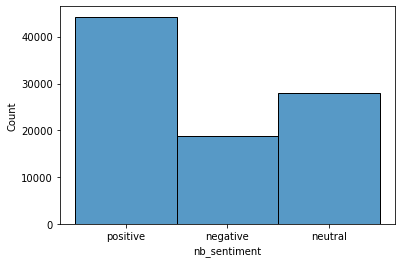

In [13]:
sns.histplot(data=df, x='nb_sentiment')

### Splitting, Data balancing and Training My Model

Split the data into training and testing sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['nb_sentiment'], test_size=0.2, random_state=42)

Create a CountVectorizer object to convert text data into a matrix of token counts:

In [15]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#### Balancing my Data By Oversampling the Minority Classes

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

#### Training
Train a Multinomial Naive Bayes classifier on the training data:

In [18]:
clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

#### Testing & Prediction
Make predictions on the testing data:

In [19]:
y_pred = clf.predict(X_test_counts)

#### Evaluating my Model performance
Calculate the accuracy score of the classifier:

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8031534996154269


Calculate the confusion matrix:

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2848  248  624]
 [ 708 4054  778]
 [ 831  394 7717]]


<b>Generate a classification report:</b>

In [22]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.77      0.70      3720
     neutral       0.86      0.73      0.79      5540
    positive       0.85      0.86      0.85      8942

    accuracy                           0.80     18202
   macro avg       0.79      0.79      0.78     18202
weighted avg       0.81      0.80      0.80     18202



<b>Using the trained classifier to make predictions on new data.</b>

First, I clean the text data and transform it using the CountVectorizer object:

In [23]:
new_text = "I won't be voting in this election"
clean_new_text = clean_text(new_text)
new_text_counts = vectorizer.transform([clean_new_text])

In [24]:
new_prediction = clf.predict(new_text_counts)
print(new_prediction)

['negative']


## Using a Recurrent Network Model (RNN) Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

2023-04-28 09:17:18.600580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Create the label encoding for the sentiment labels:

In [26]:
sentiment_labels = {
    'positive': 0,
    'negative': 1,
    'neutral': 2
}

df['label'] = df['nb_sentiment'].map(sentiment_labels)

In [27]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['clean_text'].values)
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X)

y = df['label'].values

### Splitting, Data balancing and Defining My Model

#### Data balancing

In [28]:
# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Splitting
Split the dataset into training and testing sets:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Defining the model

In [30]:
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

#### Compiling the Model

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es])

Epoch 1/10
1328/1328 [==============================] - 120s 88ms/step - loss: -26.1258 - accuracy: 0.4342 - val_loss: -50.5179 - val_accuracy: 0.4832
Epoch 2/10
1328/1328 [==============================] - 114s 86ms/step - loss: -74.6473 - accuracy: 0.4729 - val_loss: -95.2887 - val_accuracy: 0.5009
Epoch 3/10
1328/1328 [==============================] - 119s 90ms/step - loss: -119.7817 - accuracy: 0.4846 - val_loss: -137.8476 - val_accuracy: 0.4927
Epoch 4/10
1328/1328 [==============================] - 125s 94ms/step - loss: -164.5252 - accuracy: 0.4891 - val_loss: -180.7446 - val_accuracy: 0.4856
Epoch 5/10
1328/1328 [==============================] - 127s 95ms/step - loss: -208.3715 - accuracy: 0.4912 - val_loss: -223.1039 - val_accuracy: 0.4850
Epoch 6/10
1328/1328 [==============================] - 129s 97ms/step - loss: -254.9684 - accuracy: 0.4906 - val_loss: -266.1237 - val_accuracy: 0.4949
Epoch 7/10
1328/1328 [==============================] - 160s 121ms/step - loss: -301.3

#### Evaluating the model

<b>Accuracy</b>

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Loss: ', (loss*100))
print('Accuracy: ', (accuracy*100))

830/830 [==============================] - 7s 9ms/step - loss: -437.0958 - accuracy: 0.4810
Loss:  -43709.57946777344
Accuracy:  48.10212254524231


In [33]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

830/830 [==============================] - 7s 7ms/step


In [34]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 48.10%


<b> Classification Report:</b>

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66      8816
           1       0.39      0.82      0.53      8943
           2       0.00      0.00      0.00      8797

    accuracy                           0.48     26556
   macro avg       0.37      0.48      0.40     26556
weighted avg       0.37      0.48      0.40     26556



/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Checking for Overfitting as a result of Oversampling

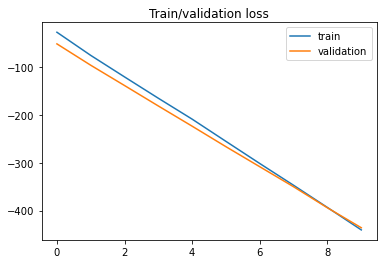

In [36]:
# Train/validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Train/validation loss")
plt.legend()
plt.show()

If you observe a significant gap between the training and validation curves in the loss or accuracy plots, it could indicate overfitting. Additionally, if the validation loss or accuracy starts to worsen after a certain number of epochs, it could indicate that the model is overfitting beyond that point and you may need to use early stopping or adjust the model architecture or hyperparameters.

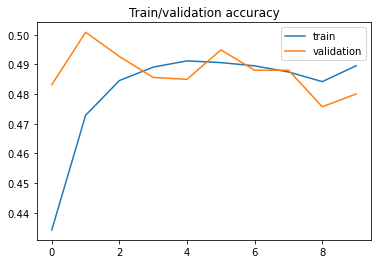

In [37]:
# Train/validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title("Train/validation accuracy")
plt.legend()
plt.show()

#### Saving the model

In [38]:
# Save the trained model to a file
model.save('rnn_main_model.h5')

#### Using the model to make predictions

In [39]:
new_text = "Going by the BVAS setup disclosed today, this elections will be free and fair."
clean_new_text = clean_text(new_text)
new_text_seq = tokenizer.texts_to_sequences([clean_new_text])
new_text_pad = pad_sequences(new_text_seq)

# Load the saved model
from keras.models import load_model

model = load_model('rnn_main_model.h5')

# Make predictions on new data
new_text_padded = pad_sequences(new_text_seq, maxlen=X.shape[1])
predictions = model.predict(new_text_padded)

# Convert prediction to sentiment label
label = {0: 'positive', 1: 'negative', 2: 'neutral'}
new_sentiment = label[np.argmax(predictions)]

# Print the predicted sentiment label for the new data
print(new_sentiment)

1/1 [==============================] - 0s 266ms/step
positive


### Improving my RNN Model

In [40]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Dropout, Bidirectional

In [41]:
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(GRU(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

In this model, I added a Bidirectional LSTM layer followed by a Bidirectional GRU layer. Bidirectional layers allow the RNN to learn from both past and future time steps, which can help capture more contextual information from the input text. I also increased the number of neurons in each layer to 64 and 32 respectively.

Compile and train the model.

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es])

Epoch 1/10
1328/1328 [==============================] - 214s 148ms/step - loss: -12.0613 - accuracy: 0.4165 - val_loss: -19.9646 - val_accuracy: 0.3948
Epoch 2/10
1328/1328 [==============================] - 177s 133ms/step - loss: -35.8051 - accuracy: 0.4573 - val_loss: -44.8391 - val_accuracy: 0.4467
Epoch 3/10
1328/1328 [==============================] - 181s 137ms/step - loss: -58.2387 - accuracy: 0.4851 - val_loss: -65.8697 - val_accuracy: 0.4789
Epoch 4/10
1328/1328 [==============================] - 177s 133ms/step - loss: -80.2181 - accuracy: 0.5003 - val_loss: -88.9207 - val_accuracy: 0.5123
Epoch 5/10
1328/1328 [==============================] - 180s 135ms/step - loss: -103.5521 - accuracy: 0.5094 - val_loss: -110.0733 - val_accuracy: 0.5138
Epoch 6/10
1328/1328 [==============================] - 183s 138ms/step - loss: -128.3537 - accuracy: 0.5194 - val_loss: -131.9272 - val_accuracy: 0.5207
Epoch 7/10
1328/1328 [==============================] - 197s 148ms/step - loss: -153

#### Evaluating Improved RNN Model:¶

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Loss: ', (loss*100))
print('Accuracy: ', (accuracy*100))

830/830 [==============================] - 12s 14ms/step - loss: -219.8197 - accuracy: 0.5144
Loss:  -21981.971740722656
Accuracy:  51.43846869468689


### Adding a Technical Component to My RNN Model - GloVe
Improving my RNN Model with a GloVe Pretrained Model: I used a pre-trained word embedding such as GloVe to improve the performance of the model. Here's how I added the GloVe embeddings:

In [44]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [45]:
#!unzip glove.6B.zip -d glove_embedding

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier

Had to comment out the above code so it doesn't keep downloading and unzipping everytime.

Load the GloVe embedding file into a dictionary:

In [47]:
glove_embeddings = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

Create an embedding matrix using the GloVe embeddings:

In [48]:
MAX_WORDS = 5000
EMBEDDING_DIM = 100
max_len = 25

num_words = min(MAX_WORDS, len(tokenizer.word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i > MAX_WORDS:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

I then modified the Embedding layer in the model to use the GloVe embedding matrix:

In [49]:
maxlen = max([len(x) for x in X])
X = pad_sequences(X, maxlen=maxlen)

model.add(Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))

Setting trainable=False in the Embedding layer ensures that the pre-trained embeddings are not updated during training, which can help prevent overfitting.

In [50]:
tokenizer = Tokenizer(num_words=MAX_WORDS, split=' ')
tokenizer.fit_on_texts(df['clean_text'].values)
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X, maxlen=max_len, padding='post')

y = df['label']

In [51]:
def create_model(embedding_size=128, lstm_units=128, dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(num_words, embedding_size, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In this code, I use the GridSearchCV class from scikit-learn to perform a grid search over a range of hyperparameters. I defined the parameter grid for the grid search, which consists of different combinations of embedding_size, lstm_units, and dropout_rate.

I then created a Keras classifier using the create_model function, and pass it to the GridSearchCV object along with the parameter grid, the number of cross-validation folds (cv=3), and the verbosity level (verbose=1).

I fitted the GridSearchCV object on the training data, specifying the validation data as well as the early stopping callback to prevent overfitting.

Finally, I printed the best parameters and score found by the grid search. These were then used to create a new model with optimized hyperparameters.

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'embedding_size': [100, 128, 256],
    'lstm_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Create the model using KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

# Fit GridSearchCV object on the training data
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es])

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

/var/folders/q8/rbryqcvn01jcb9tpfkgn9g6c0000gn/T/ipykernel_6501/2782533651.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
1107/1107 [==============================] - 46s 41ms/step - loss: -49.2884 - accuracy: 0.4034


/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/Users/cazren/opt/anaconda3/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = s

3320/3320 [==============================] - 86s 25ms/step - loss: -15.6049 - accuracy: 0.3960 - val_loss: -34.6407 - val_accuracy: 0.4277
Best Parameters:  {'dropout_rate': 0.3, 'embedding_size': 100, 'lstm_units': 64}
Best Score:  0.4192391335964203


#### Using the New Hyperparameters to finetune my Model

In [53]:
MAX_WORDS = 5000
EMBEDDING_DIM = 100
max_len = 25

In [54]:
def load_glove_embeddings(glove_file):
    """
    Load the GloVe embeddings from a file.

    :param glove_file: path to the GloVe file
    :return: a dictionary containing the GloVe embeddings
    """
    embeddings = {}
    with open(glove_file, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [55]:
# Load GloVe word embeddings
glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

# Create embedding matrix
num_words = min(MAX_WORDS, len(tokenizer.word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i > MAX_WORDS:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the RNN model with pre-trained embeddings
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1], weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es])

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

# Save the trained model to a file
model.save('rnn_improved_model.h5')

Epoch 1/10
1328/1328 [==============================] - 84s 61ms/step - loss: -15.0047 - accuracy: 0.3952 - val_loss: -32.1063 - val_accuracy: 0.4186
Epoch 2/10
1328/1328 [==============================] - 78s 58ms/step - loss: -45.3131 - accuracy: 0.4111 - val_loss: -57.7061 - val_accuracy: 0.4408
Epoch 3/10
1328/1328 [==============================] - 80s 60ms/step - loss: -76.0202 - accuracy: 0.4191 - val_loss: -95.9679 - val_accuracy: 0.4254
Epoch 4/10
1328/1328 [==============================] - 79s 60ms/step - loss: -99.3289 - accuracy: 0.4243 - val_loss: -120.8061 - val_accuracy: 0.4458
Epoch 5/10
1328/1328 [==============================] - 79s 60ms/step - loss: -131.7746 - accuracy: 0.4282 - val_loss: -151.8308 - val_accuracy: 0.4458
Epoch 6/10
1328/1328 [==============================] - 77s 58ms/step - loss: -161.8575 - accuracy: 0.4287 - val_loss: -184.7920 - val_accuracy: 0.4572
Epoch 7/10
1328/1328 [==============================] - 80s 60ms/step - loss: -194.7673 - accur

#### Using the new fintuned model for Predictions

In [56]:
# Load the best model from GridSearchCV
best_model = grid_result.best_estimator_.model

# Make predictions on new data
new_data = ["This is a positive sentence.", "This is a negative sentence."]
new_data = tokenizer.texts_to_sequences(new_data)
new_data = pad_sequences(new_data, padding='post', maxlen=max_len)
predictions = best_model.predict(new_data)

# Print the predictions
for i, prediction in enumerate(predictions):
    print("Sentence {} has a {:.2f}% chance of being positive.".format(i+1, prediction[0]*100))


1/1 [==============================] - 0s 438ms/step
Sentence 1 has a 100.00% chance of being positive.
Sentence 2 has a 100.00% chance of being positive.


### Visualization

#### Sentiment Per Candidate

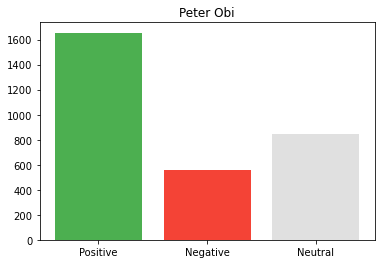

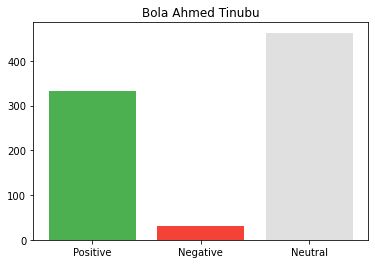

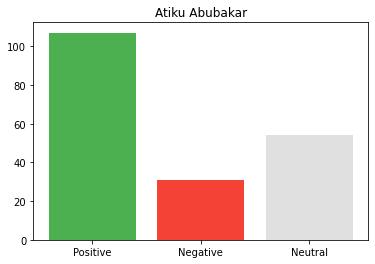

In [57]:
import matplotlib.pyplot as plt

# create a dictionary to store the sentiment counts for each candidate
candidate_sentiments = {
    'Peter Obi': {'positive': 0, 'negative': 0, 'neutral': 0},
    'Bola Ahmed Tinubu': {'positive': 0, 'negative': 0, 'neutral': 0},
    'Atiku Abubakar': {'positive': 0, 'negative': 0, 'neutral': 0}
}

# loop through the tweets and update the sentiment counts for each candidate
for i in range(len(df)):
    text = df.iloc[i]['text']
    sentiment = clf.predict(vectorizer.transform([text]))[0]
    if 'Peter Obi' in text:
        candidate_sentiments['Peter Obi'][sentiment] += 1
    elif 'Bola Ahmed Tinubu' in text:
        candidate_sentiments['Bola Ahmed Tinubu'][sentiment] += 1
    elif 'Atiku Abubakar' in text:
        candidate_sentiments['Atiku Abubakar'][sentiment] += 1

# plot the sentiment counts for each candidate as a stacked bar chart
labels = ['Positive', 'Negative', 'Neutral']
colors = ['#4CAF50', '#F44336', '#E0E0E0']

for candidate in candidate_sentiments:
    counts = [candidate_sentiments[candidate]['positive'], candidate_sentiments[candidate]['negative'], candidate_sentiments[candidate]['neutral']]
    plt.bar(labels, counts, bottom=0, color=colors)
    plt.title(candidate)
    plt.show()

#### Topic Frequency and Candidate Popularity

In [58]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
#displaying a function to quickly generate a visual representation of the 
#most frequent words in a piece of text column used in the dataset. 
#and to identify important themes or topics within the data.


stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

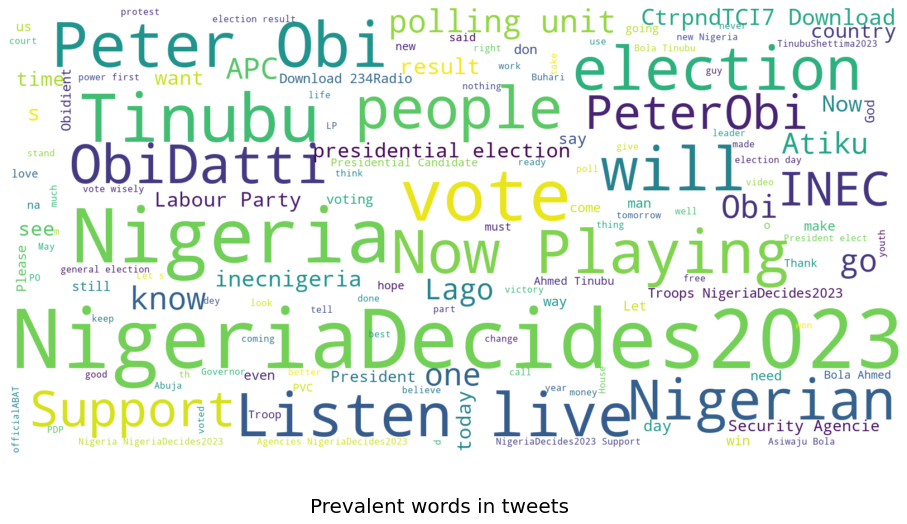

In [60]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

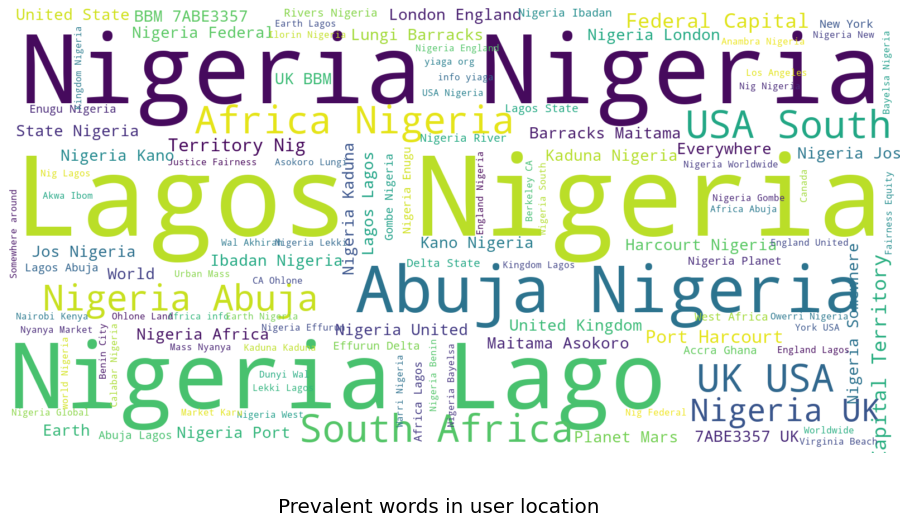

In [61]:
show_wordcloud(df['user_location'], title = 'Prevalent words in user location')

#### Time Variation of Tweets

In [62]:
#converting the date column to the appriopriate datatype
df['datedt'] = pd.to_datetime(df['date'], errors="coerce")

#creating a new column from the date column
df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['dayofweek'] = df['datedt'].dt.dayofweek
df['dayofweek_name'] = df['datedt'].dt.day_name()
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date

agg_df = df.groupby(["date_only"])["text"].count().reset_index()
agg_df.columns = ["date_only", "count"]

In [63]:
#creating a line plot to visualize how a particular variable changes over time or across categories.
def plotTimeV(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

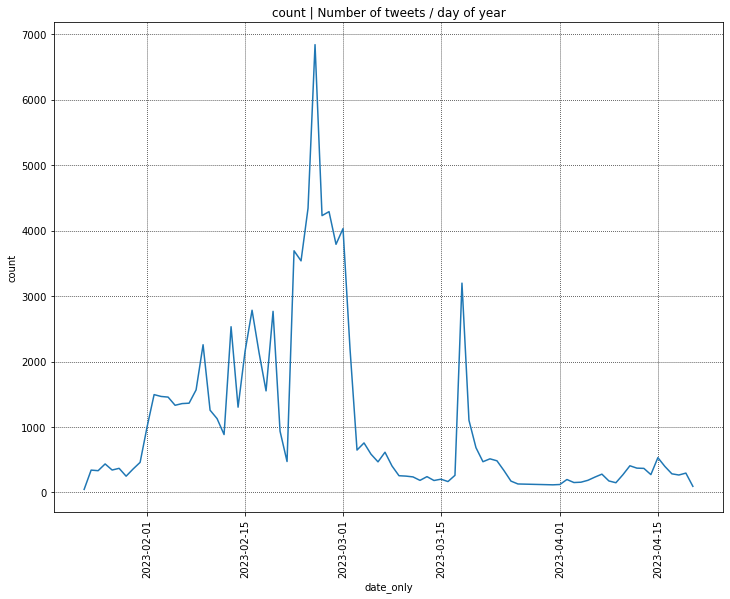

In [64]:
plotTimeV(agg_df, title="Number of tweets / day of year",size=3)
